#Stroke Risk Prediction

**Team 4:**
* Ting-Hsuan Chen 
* Zixing Li 
* Maria Stella Vardanega 
* Rohan Gupta 
* Deniz Ipek Ozakyol 

***
**Dataset:** Confidential Source - fedesoriano (https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/metadata)

**Goal:**
* To analyze the major risk factors that may be associated with a stroke event. We will use machine learning models and visualization methods to predict which individuals will be more likely to experience a stroke. 

**The features of our dataset:**
* *id:* Unique ID of the patient
* *gender:* Gender of the patient
* *age:* Age of the patient
* *hypertension:* Whether the patient has hypertension (binary feature)
* *heart_disease:* Whether the patient has a heart disease (binary feature)
* *ever_married:* Whether the patient has ever been married (Yes/No)
* *work_type:* Work type of the patient (Private/Self Employed/Government Job)
* *Residence_type:* Residence type of the patient (Urban/Rural)
* *avg_glucose_level:* Average glucose level of the patient's blood
* *bmi:* Body Mass Index(BMI = kg/m2) of the patient
* *smoking_status:* Smoking status of the patient
* *stroke:* Stroke event (target variable)

##Table of Contents

A. Data Cleaning

> a. Dealing with missing values 

> b. Pairplot

> c. Heatmap

B. Data Exploration

> a. A glance at our numerical and categorical variables

>> a) Numerical variables distribution

>> b) Categorical variables distribution

> b. Do males have more stroke events than females?

> c. Is there an age where strokes happen more often?

> d. Is an older man more likely to get a stroke compared to an older woman?

> e. How are physical conditions related to a stroke event?

> f. Do Factors like Work Type, Marriage Status and Residence Type Affect the Probability of having a Stroke?

C. Predicting Stroke Events - Machine Learning

> a. Random Forest Classifier


> b. Plotting the most important features in predicting a stroke event

D. Conclusions

E. Citations

## A. Data Cleaning

In [49]:
#Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [50]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [51]:
#Previewing data
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [52]:
#Overview of dataframe structure
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### a. Dealing with missing values
We started by checking which columns had missing values, then continued to handle them as we thought was best.

In [53]:
stroke_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

As can be seen from above, there are 201 missing values in the bmi column. This comprises of approximately 3.9% of our data. Because this value is below 5% we have the choice to either impute values or drop the rows with missing data. Nevertheless, because we intend to use this dataset for machine learning, it would be best to have more rows and therefore we have decided impute values. Next, we need to choose what method to use to impute the data.

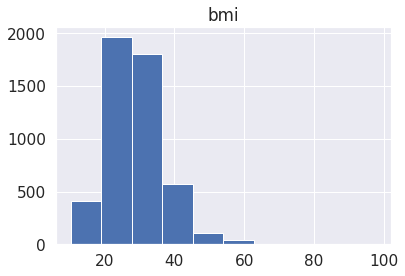

In [54]:
stroke_data.hist(column='bmi');

In [55]:
stroke_data['bmi'].std()

7.854066729680158

As can be seen from the above distribution, the bmi column values seem to be right skewed. This means that it would be more meaningful to use the median instead of the mean to impute the data. The forward and backward fill methods aren't used because the standard deviation is quite large and would thus not lead to accurate results.

In [56]:
#Imputing column median in missing values
stroke_data['bmi'].fillna(float(stroke_data['bmi'].median()), inplace=True)

In [57]:
#Checking whether missing values were imputed
stroke_data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### b. Pairplot


In [58]:
stroke_data.drop(columns=['id'],inplace=True)

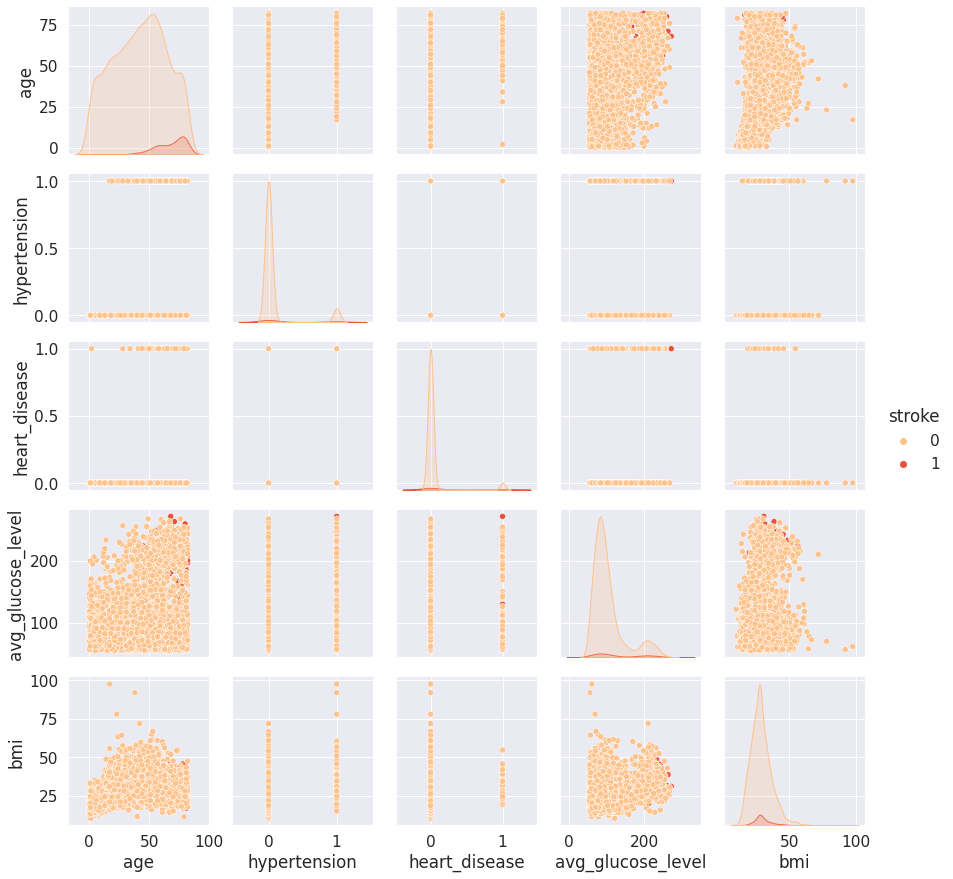

In [59]:
sns.pairplot(data=stroke_data,hue='stroke',palette='OrRd');

This pairplot illustrates two fundamental insights. The first is that there seem to be a lot more observations for indiviudals who did not experience a stroke event compared to those who did. The second, is that the variables don't seem to illustrate particularly strong correlations with each other, with the exception of avg_glucose_level and bmi, and heart_disease with hypertension.

### c. Heatmap
First we mapped the categorical variables to numerical variables. After making a correlation plot for all of the numerical variables, we found that age and stroke are closely related. Other variables such as hypertension, heart_disease and ave_glucose_level are also highly related to stroke. On the other hand, variables like work_type, bmi, and residence type don't seem to be highly correlated. Moreover, the relationship between a stroke event and marital status should be further examined as the correlation seems to be similar in magnitude to glucose level and hypertension which is unexpected. Furthermore, the ID column was removed as it is irrelevant.


In [60]:
stroke_data['work_type'] = stroke_data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})
stroke_data['gender'] = stroke_data['gender'].map({'Male':0, 'Female':1})
stroke_data['Residence_type'] = stroke_data['Residence_type'].map({'Urban':0, 'Rural':1})
stroke_data['smoking_status'] = stroke_data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
stroke_data['ever_married'] = stroke_data['ever_married'].map({'Yes':0, 'No':1})

In [61]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,1.0,61.0,0,0,0,1,1,202.21,28.1,1,1
2,0.0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1.0,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1.0,79.0,1,0,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,80.0,1,0,0,0,0,83.75,28.1,1,0
5106,1.0,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,1.0,35.0,0,0,0,1,1,82.99,30.6,1,0
5108,0.0,51.0,0,0,0,0,1,166.29,25.6,0,0


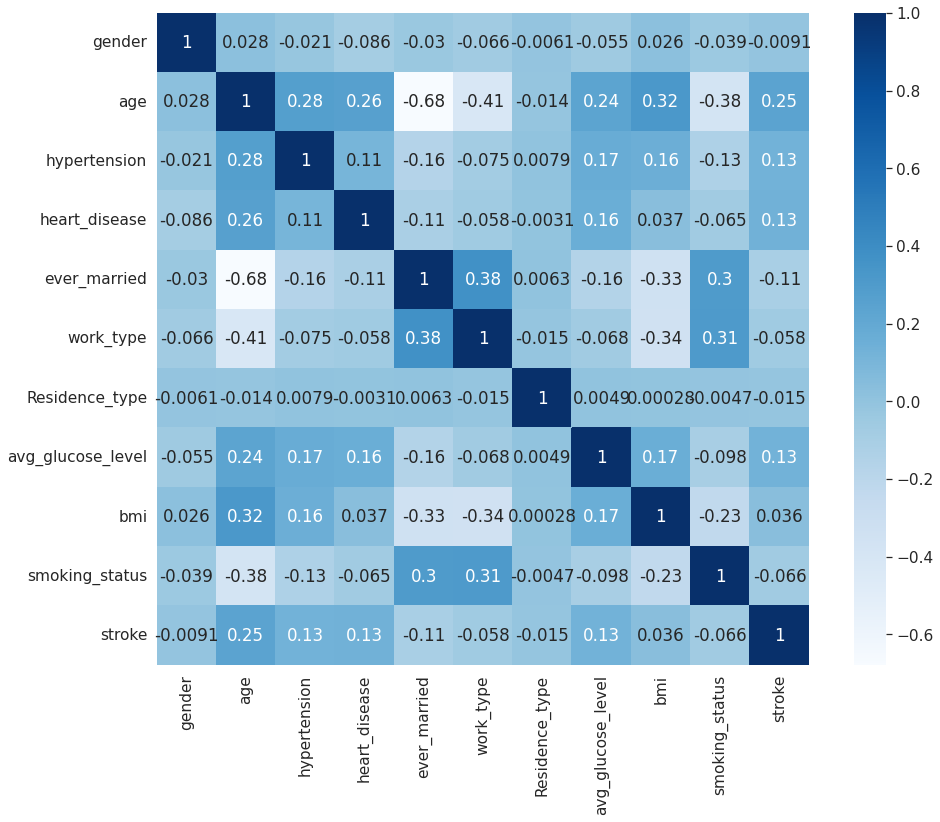

In [62]:
plt.figure(figsize=(16,12))
sns.heatmap(stroke_data.corr(method='pearson'), annot=True, cmap='Blues',square=True);

In [63]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data['bmi'].fillna(float(stroke_data['bmi'].median()), inplace=True)
stroke_data.drop(columns=['id'],inplace=True)
stroke_data.head(5) 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## B. Data Exploration

###a. A glance at our numerical and categorical variables###


####(a) Numerical variables distribution####

Compared with the distribution of age, the distributions of average glucose level and bmi are more concentrated. Observations' average glucose level are mostly concentrated between 70 to 100. As for bmi, observations are mostly distributed between 25 to 35.

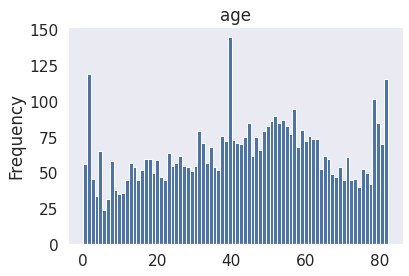

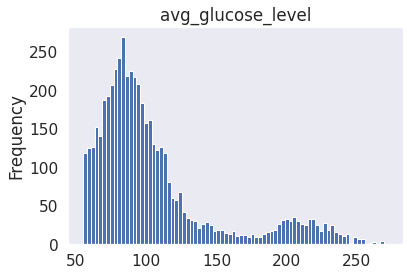

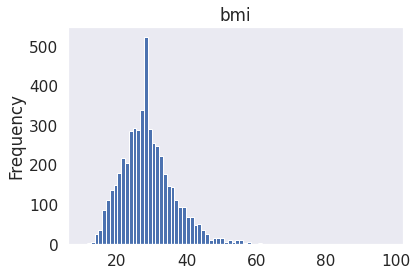

In [64]:
num_var = ['age', 'avg_glucose_level','bmi']
for i in num_var:
    stroke_data[i].plot(kind='hist', bins=80)
    plt.title(i)
    plt.grid()
    plt.show()

####(b) Categorical variables distribution####

In this dataset : 


*   There are more females than males.
*   Most people do not have hypertension or heart disease problems.
*   More than 50% of patients have been married.
*   The vast majority of people work in private companies.
*   There is not much difference between the number of people living in urban and rural.
*   For smoking status, the majority of people have never smoked.








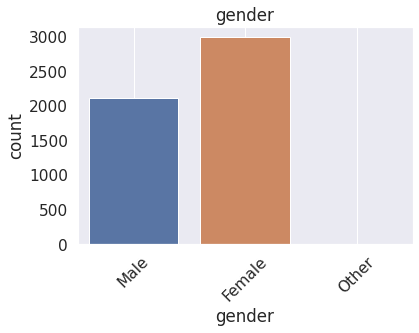

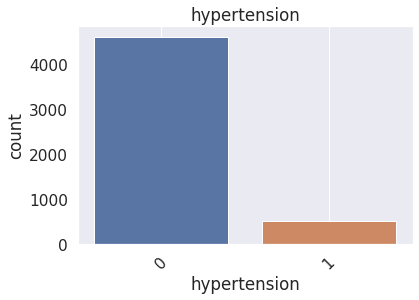

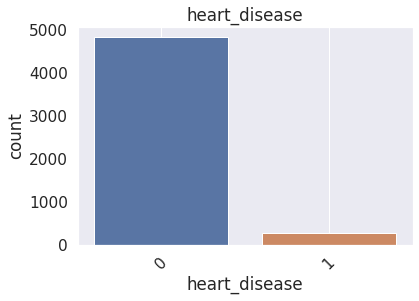

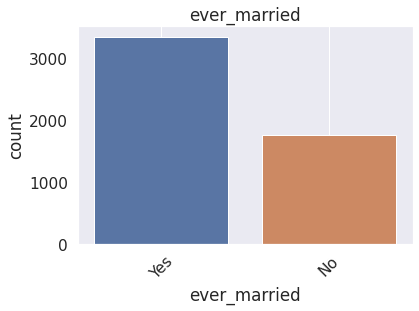

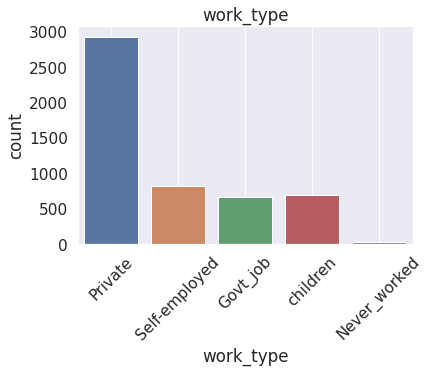

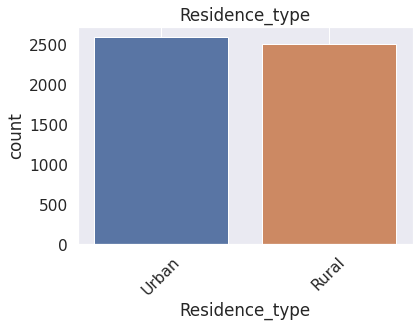

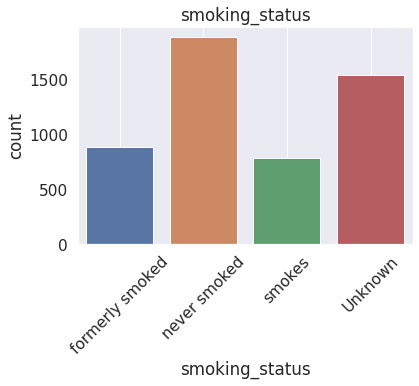

In [65]:
cat_var = ['gender','hypertension','heart_disease','ever_married',
                'work_type','Residence_type','smoking_status']
for i in cat_var:
    sns.countplot(x=stroke_data[i], data=stroke_data)
    plt.title(i)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

###b. Do males have more stroke events than females?

In [66]:
MALE_p=round(len(stroke_data[stroke_data['stroke']==1][stroke_data['gender']=='Male'])/len(stroke_data[stroke_data['gender']=='Male']),3)
FEMALE_p= round(len(stroke_data[stroke_data['stroke']==1][stroke_data['gender']=='Female'])/len(stroke_data[stroke_data['gender']=='Female']),3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


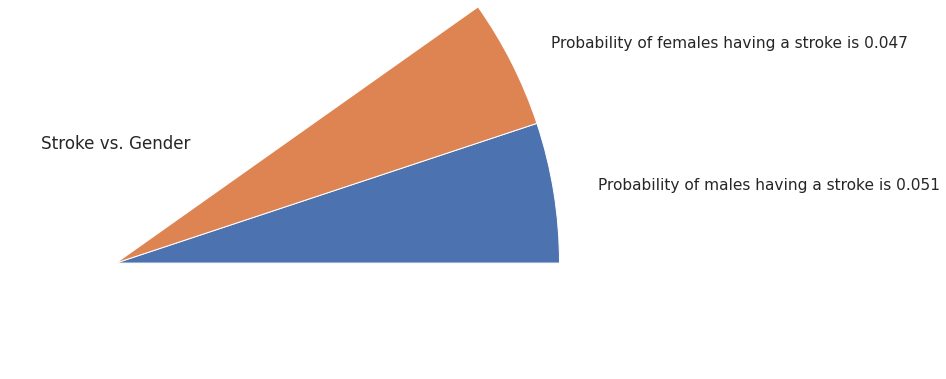

In [67]:
plt.pie([MALE_p,FEMALE_p],labels=['Probability of males having a stroke is {}'.format(MALE_p),'Probability of females having a stroke is {}'.format(FEMALE_p)],radius=5.1)
plt.title('Stroke vs. Gender');

It seems like males face a higher chance of having a stroke but since the difference is small, more factors need to be examined!

**Do Factors Like Smoking Status and Hypertension help provide a better inference?**

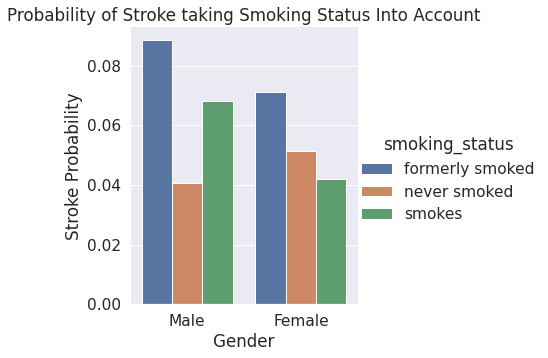

In [68]:
x_snew=stroke_data[stroke_data['smoking_status']!='Unknown']
sns.catplot(x='gender',y='stroke',data=x_snew,kind='bar',hue='smoking_status',order=['Male','Female'],ci=None)
plt.title('Probability of Stroke taking Smoking Status Into Account')
plt.xlabel('Gender')
plt.ylabel('Stroke Probability');

From this graph we can infer that males who formerly smoked and currently smoke have a higher chance of facing a stroke. On the other hand, females who never smoked face a higher chance of experiencing a stroke compared to females who currently smoke. The relationship between strokes and smoking for females is not very intuitive, thus, we have no clear results! Further analysis is needed.


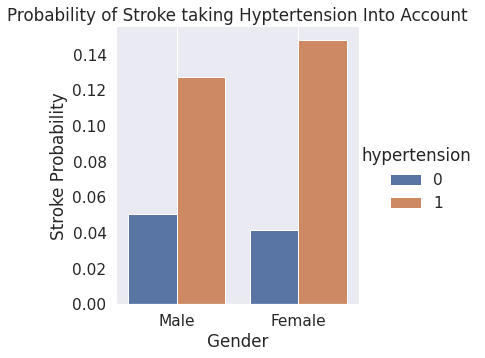

In [69]:
sns.catplot(x='gender',y='stroke',data=x_snew,kind='bar',hue='hypertension',ci=None,order=['Male','Female'])
plt.title('Probability of Stroke taking Hyptertension Into Account')
plt.xlabel('Gender')
plt.ylabel('Stroke Probability');
plt.grid() 

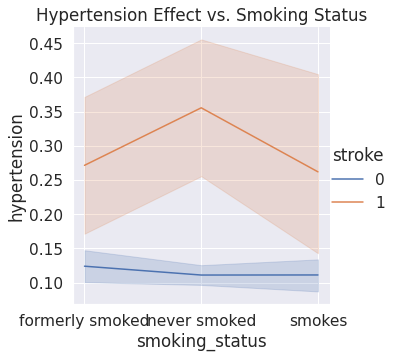

In [70]:
sns.relplot(x='smoking_status',y='hypertension',data=x_snew,kind='line',hue='stroke')
plt.title('Hypertension Effect vs. Smoking Status');

We can infer that people who are hypertensive and smoke are at a higher risk of having a stroke. However, there is also a discrepancy that is, we can see that a person who has not smoked but is hypertensive has a 35% chance of facing a stroke, which is the highest. Therefore, we can infer that hypertension is more impactful than smoking.


###c. Is there an age where strokes happen more often?


 We first calculated the average age of stroke patients and find out which age has the highest rate of getting a stroke, and then we made a line graph to describe the relationship between age and stroke. 

In [71]:
# The average age of getting a stroke
print('The average age of getting a stroke is {} years old'.format(round(stroke_data[stroke_data['stroke'] == 1]['age'].mean(),2)))

The average age of getting a stroke is 67.73 years old


In [72]:
stroke_data['age'] = round(stroke_data['age'])

In [73]:
# Calculate which age has the highest probability (%) of getting stroke
stroke_data_age = stroke_data.groupby(['age']).mean().sort_values('age',ascending=False)
stroke_age_max = stroke_data_age[stroke_data_age['stroke']==max(stroke_data_age['stroke'])]
stroke_age_max[['stroke']]

,stroke
age,
80.0,0.242857


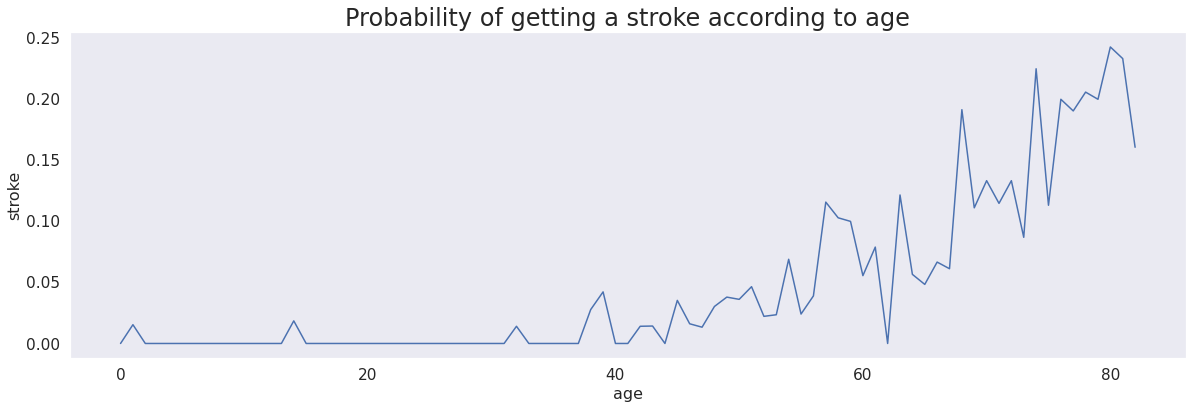

In [74]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=stroke_data_age,x=stroke_data_age.index,y='stroke')
plt.title('Probability of getting a stroke according to age', size = 24)
plt.xlabel("age", size = 16)
plt.ylabel("stroke", size = 16)
plt.grid()
plt.show()

As can be seen from above, the average age of getting a stroke is 67 year old. For all individuals who have experienced a stroke event, 78-year-old stroke patients account for the most. It can also be seen from the graph that as the age increases, the probability of a stroke event also increases.

###d. Is an older man more likely to get a stroke than an older woman?
We first defined the young generation as 0 to 24 years old, the middle-aged group as 25 to 64 years old, and the elderly group as 65 years old and above. Then we calculated the probability of male and female getting a stroke for each age group.

In [75]:
#all (0-82)
all_female_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['gender'] == 'Female')])
all_female_count = len(stroke_data[(stroke_data['gender'] == 'Female')])
all_male_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['gender'] == 'Male')])
all_male_count = len(stroke_data[(stroke_data['gender'] == 'Male')])

all_female_prob = all_female_stroke/all_female_count
all_male_prob = all_male_stroke/all_male_count
all_prob = len(stroke_data[(stroke_data['stroke'] == 1)])/len(stroke_data)
# print(all_female_prob,all_male_prob,all_prob)

#young (0-24)
young_female_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['age'] < 25)&(stroke_data['gender'] == 'Female')])
young_female_count = len(stroke_data[(stroke_data['age'] < 25)&(stroke_data['gender'] == 'Female')])
young_male_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['age'] < 25)&(stroke_data['gender'] == 'Male')])
young_male_count = len(stroke_data[(stroke_data['age'] < 25)&(stroke_data['gender'] == 'Male')])

young_female_prob = young_female_stroke/young_female_count
young_male_prob = young_male_stroke/young_male_count
young_prob = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['age'] < 25)])/len(stroke_data[(stroke_data['age'] < 25)])
# print(young_female_prob,young_male_prob,young_prob)

#mid (25-64)
mid_female_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['age'] >= 25)&(stroke_data['age'] < 65)&(stroke_data['gender'] == 'Female')])
mid_female_count = len(stroke_data[(stroke_data['age'] >= 25)&(stroke_data['age'] < 65)&(stroke_data['gender'] == 'Female')])
mid_male_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['age'] >= 25)&(stroke_data['age'] < 65)&(stroke_data['gender'] == 'Male')])
mid_male_count = len(stroke_data[(stroke_data['age'] >= 25)&(stroke_data['age'] < 65)&(stroke_data['gender'] == 'Male')])
mid_prob = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['age'] >= 25)&(stroke_data['age'] < 65)])/len(stroke_data[(stroke_data['age'] >= 25)&(stroke_data['age'] < 65)])
mid_female_prob = mid_female_stroke/mid_female_count
mid_male_prob = mid_male_stroke/mid_male_count
# print(mid_female_prob,mid_male_prob,mid_prob)

#old (65->)
old_female_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['age'] >= 65)&(stroke_data['gender'] == 'Female')])
old_female_count = len(stroke_data[(stroke_data['age'] >= 65)&(stroke_data['gender'] == 'Female')])
old_male_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['age'] >= 65)&(stroke_data['gender'] == 'Male')])
old_male_count = len(stroke_data[(stroke_data['age'] >= 65)&(stroke_data['gender'] == 'Male')])
old_prob = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['age'] > 65)])/len(stroke_data[(stroke_data['age'] > 65)])
old_female_prob = old_female_stroke/old_female_count
old_male_prob = old_male_stroke/old_male_count
# print(old_female_prob,old_male_prob,old_prob)

data = [['Female',all_female_prob,young_female_prob,mid_female_prob,old_female_prob],['Male',all_male_prob,young_male_prob,mid_male_prob,old_male_prob],['All',all_prob,young_prob,mid_prob,old_prob]]
data2 = [[all_prob,young_prob,mid_prob,old_prob]]
Q2 = pd.DataFrame(
    data,columns=['Gender','all','young','mid','old']
)

print(Q2)


   Gender       all     young       mid       old
0  Female  0.047094  0.003017  0.026729  0.152459
1    Male  0.051064  0.000000  0.037333  0.158273
2     All  0.048728  0.001618  0.030910  0.161658


It can be seen from above that, the chance of an elderly man getting a stroke is about the same as that of an elderly woman. Furthermore, in all age groups, there is little difference in the chances of men and women getting a stroke, supporting the fact that age has more influence on the chance of getting a stroke than gender.

###e. How are physical conditions (hypertension, heart disease, glucose, bmi) related to a stroke event?

**Hypertension**

In this part, we calculated the chance of getting a stroke with and without hypertension.

In [76]:
stroke_data.pivot_table(values='stroke', index=['hypertension'], aggfunc='sum')

,stroke
hypertension,
0,183
1,66


In [77]:
hyper_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['hypertension'] == 1)])
no_hyper_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['hypertension'] == 0)])
all_hyper = len(stroke_data[(stroke_data['hypertension'] == 1)])
all_no_hyper = len(stroke_data[(stroke_data['hypertension'] == 0)])
hyper_stroke_prob = hyper_stroke/all_hyper
no_hyper_stroke_prob = no_hyper_stroke/all_no_hyper
print('The chance of a patient with hypertension getting a stroke is {:.0%}'.format(hyper_stroke_prob))
print('The chance of a patient without hypertension getting a stroke is {:.0%}'.format(no_hyper_stroke_prob))

The chance of a patient with hypertension getting a stroke is 13%
The chance of a patient without hypertension getting a stroke is 4%


Based on information provided above, we can see the probability of a patient with hypertension getting a stroke is 13%, which is three times that of a patient without hypertension.

**Heart disease**

In this part, we calculated the chance of getting a stroke with and without heart disease.

In [78]:
stroke_data.pivot_table(values='stroke', index=['heart_disease'], aggfunc='sum')

,stroke
heart_disease,
0,202
1,47


In [79]:
heart_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['heart_disease'] == 1)])
no_heart_stroke = len(stroke_data[(stroke_data['stroke'] == 1)&(stroke_data['heart_disease'] == 0)])
all_heart = len(stroke_data[(stroke_data['heart_disease'] == 1)])
all_no_heart = len(stroke_data[(stroke_data['heart_disease'] == 0)])
heart_stroke_prob= heart_stroke/all_heart
no_heart_stroke_prob= no_heart_stroke/all_no_heart
print('The chance of a patient with heart disease getting a stroke is {:.0%}'.format(heart_stroke_prob))
print('The chance of a patient without heart disease getting a stroke is {:.0%}'.format(no_heart_stroke_prob))

The chance of a patient with heart disease getting a stroke is 17%
The chance of a patient without heart disease getting a stroke is 4%


According to the information stated above, we can see that the probability of a patient with heart disease getting a stroke is 17%, which is four times that of a patient without heart disease.

**Average Glucose Level**

We made graphs plotting average glucose level, stroke, hypertension and heart disease, trying to find the relationship between average glucose level and other physical conditions.

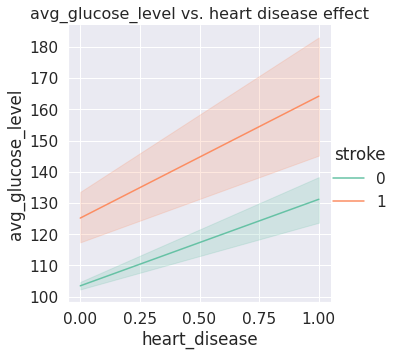

In [80]:
sns.set_palette("Set2")
sns.relplot(x='heart_disease',y='avg_glucose_level',data=stroke_data,kind='line',hue='stroke')
plt.title('avg_glucose_level vs. heart disease effect', size = 16);

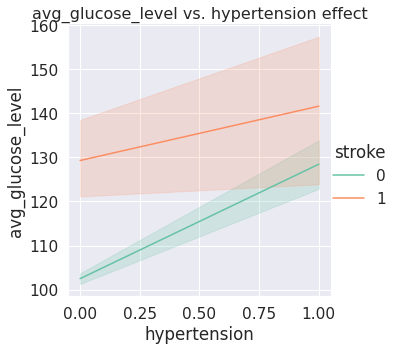

In [81]:
sns.set_palette("Set2")
sns.relplot(x='hypertension',y='avg_glucose_level',data=stroke_data,kind='line',hue='stroke')
plt.title('avg_glucose_level vs. hypertension effect', size = 16);

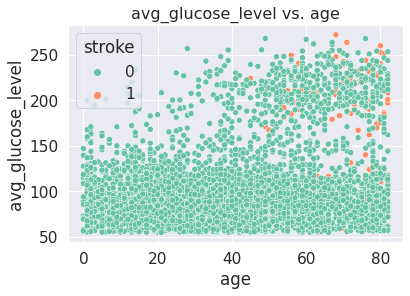

In [82]:
sns.set_palette("Set2")
sns.scatterplot(x="age", y="avg_glucose_level", hue="stroke", data=stroke_data)
plt.title('avg_glucose_level vs. age', size = 16);

Based on information above, it can be seen that when the average glucose level rises, the number of individuals who get strokes and other physical problems also increases. We can also find that most individuals who experience a stroke event are elderly people with high average glucose level.

**Bmi**

We created several graphs to get an idea of the relationship between bmi and other factors. First, we calculated which bmi value has the most individuals who have experienced a stroke event. Then we visualized the relationship between bmi and stroke event. The results are shown below.

In [83]:
# Calculate which bmi has the most stroke patients
stroke_data_bmi = stroke_data.groupby(['bmi']).sum().sort_values('bmi',ascending=False)
stroke_bmi_max = stroke_data_bmi[stroke_data_bmi['stroke']==max(stroke_data_bmi['stroke'])]
stroke_bmi_max[['stroke']]

,stroke
bmi,
28.1,42


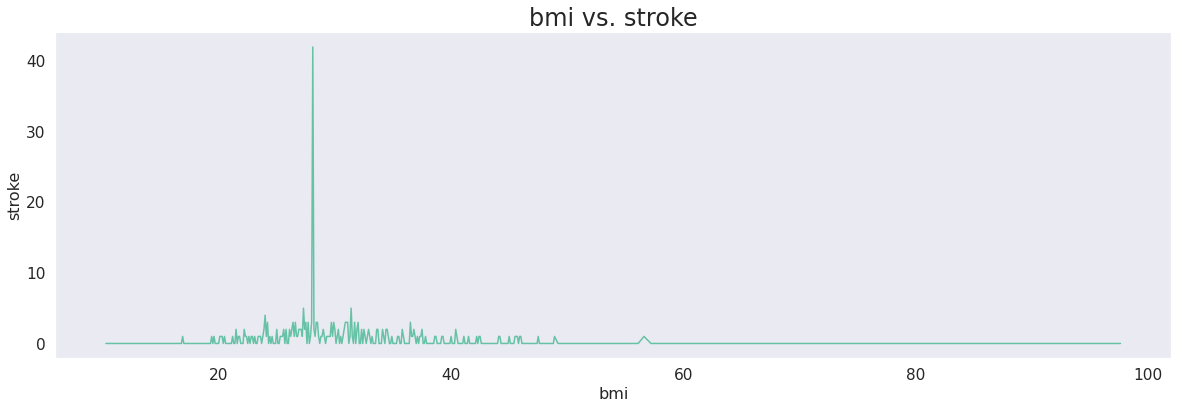

In [84]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=stroke_data_bmi,x=stroke_data_bmi.index,y='stroke')
plt.title('bmi vs. stroke', size = 24)
plt.xlabel("bmi", size = 16)
plt.ylabel("stroke", size = 16)
plt.grid()
plt.show()

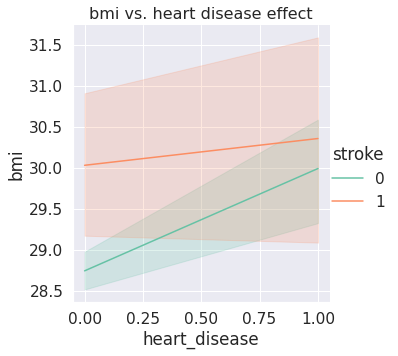

In [85]:
sns.set_palette("Set2")
sns.relplot(x='heart_disease',y='bmi',data=stroke_data,kind='line',hue='stroke')
plt.title('bmi vs. heart disease effect', size = 16);

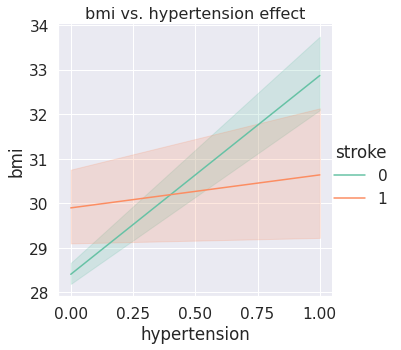

In [86]:
sns.set_palette("Set2");
sns.relplot(x='hypertension',y='bmi',data=stroke_data,kind='line',hue='stroke')
plt.title('bmi vs. hypertension effect', size = 16);

From the above information, we can find that bmi of most individuals who have experienced a stroke event is concentrated between 20 and 50. What's more, we can also see that bmi is not strongly related to other physical conditions such as stroke, hypertension and heart disease.

Nevertheless, we can see an interesting relationship. Individuals who experience a stroke tend to maintain the same bmi regardless of hypertension or heart disease. Conversely, those who have not experienced a stroke have much higher bmis with hypertension or heart disease. This may be due to the fact that individuals who have experienced a stroke event already have very high bmis compared to those who don't; therefore, the bmi of these individuals cannot increase significantly despite having hypertension or heart disease. 

###f. Do Factors like Work Type, Marriage Status and Residence Type Affect the Probability of having a Stroke?

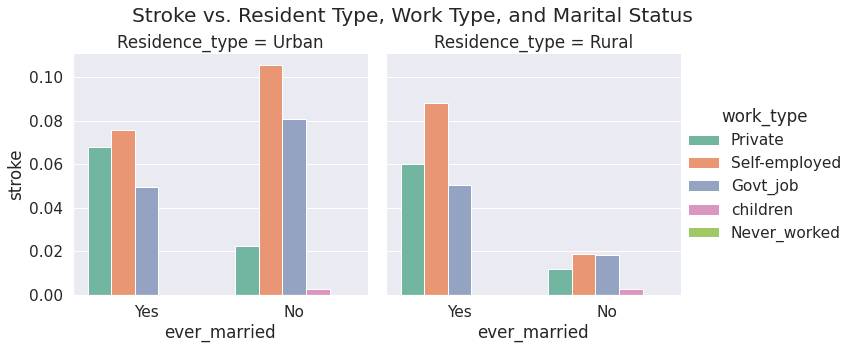

In [87]:
residence = sns.catplot(x='ever_married',y='stroke',data=stroke_data,kind='bar',col='Residence_type',hue='work_type',ci=None)
residence.fig.suptitle("Stroke vs. Resident Type, Work Type, and Marital Status")
residence.fig.subplots_adjust(top=.85)
plt.show()

As can be infered from the above graph, the Self employed population have the highest chance of facing a stroke, which can be because of the high level of stress. There is no clear indication of this relationship from the Private and Government jobs. 

Aso, there is a sharp difference in the chance of a stroke of unmarried people who work in rural versus who work in urban areas. One possible reason can be that unmarried people in urban areas face more pressure and competition than in rural areas and are always running a race to outshine!



##C. Predicting stroke events - Machine Learning

We first created all the columns for the dummy variables. This was done using the function "get_dummies". Next, only one level was selected for the dummy variables with two levels. The "drop" variable will be used to delete those columns from the x datasets in both training and testing as these columns will not be needed.

In [88]:
stroke_data_dummies = pd.get_dummies(stroke_data, drop_first=True)
drop = ['stroke']

We then need to check whether the target variable is balanced or not as this would impact tha model predictions.

In [89]:
stroke_data_dummies['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

As can be seen, the target variable is largly unbalanced; therefore, we need to normalize it. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


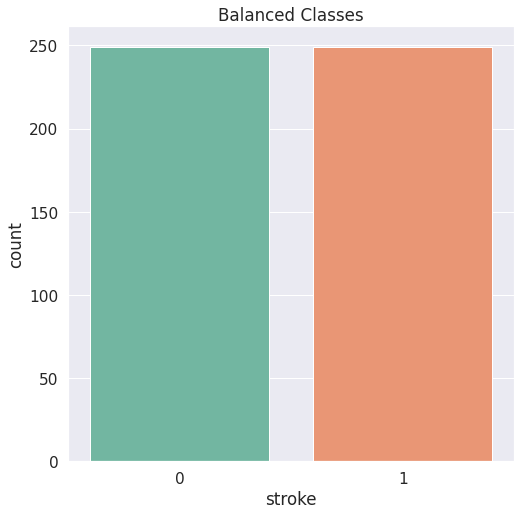

In [90]:
shuffled_stroke = stroke_data_dummies.sample(frac=1,random_state=4)

stroke_shuffled = shuffled_stroke.loc[shuffled_stroke['stroke'] == 1]

no_stroke_shuffled = shuffled_stroke.loc[shuffled_stroke['stroke'] == 0].sample(n=249,random_state=42) #we are choosing the n according to how many observations of stroke = 1 there are

normalized_stroke = pd.concat([stroke_shuffled, no_stroke_shuffled])

plt.figure(figsize=(8, 8))
sns.countplot('stroke', data=normalized_stroke)
plt.title('Balanced Classes')
plt.show()

####a. Random Forest Classifier

We first decided to use RandomizedSearchCV to tune the hyperparameters in the model by creating a random grid that includes randomized possibilities for each parameter.

In [91]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [92]:
X = normalized_stroke.drop(drop, axis=1)
y = normalized_stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
rfc = RandomForestClassifier()
rfc_tuned = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 25, cv = 5, random_state=83, n_jobs = 4)
rfc_fit = rfc_tuned.fit(X_train, y_train)

In [93]:
rfc_fit.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

Once we have found the best parameters of the model we repeat the same steps to fit the model and subsequently predict the target variable with said parameters. We are repeating the process in order to be able to later visualize the most important predictors.

In [94]:
params = {'bootstrap': False,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1600}

X = normalized_stroke.drop(drop, axis=1)
y = normalized_stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
rfc = RandomForestClassifier(**params)
rfc_fit_final = rfc.fit(X_train, y_train)
y_pred_test = rfc_fit_final.predict(X_test)

Once we trained and tested the model, we decided to visualize the confusion matrix to see the extent that the model predicted correctly for each label. 

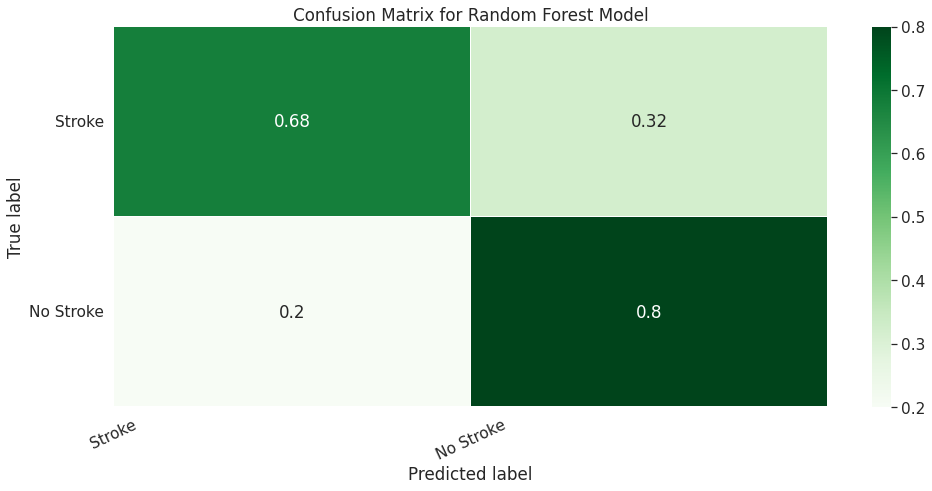

In [95]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True,
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Stroke', 'No Stroke']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

Because the accuracy of prediction is not the goal of this project, we will leave the model as is. However, we can see that it is still approximately 68% accurate in predicting true positives, and 79% accurate in predicting true negatives. 

####b. Plotting the most important features in predicting a stroke event

In order to see what predictors most affect the probability of a stroke event the plot below was created. 

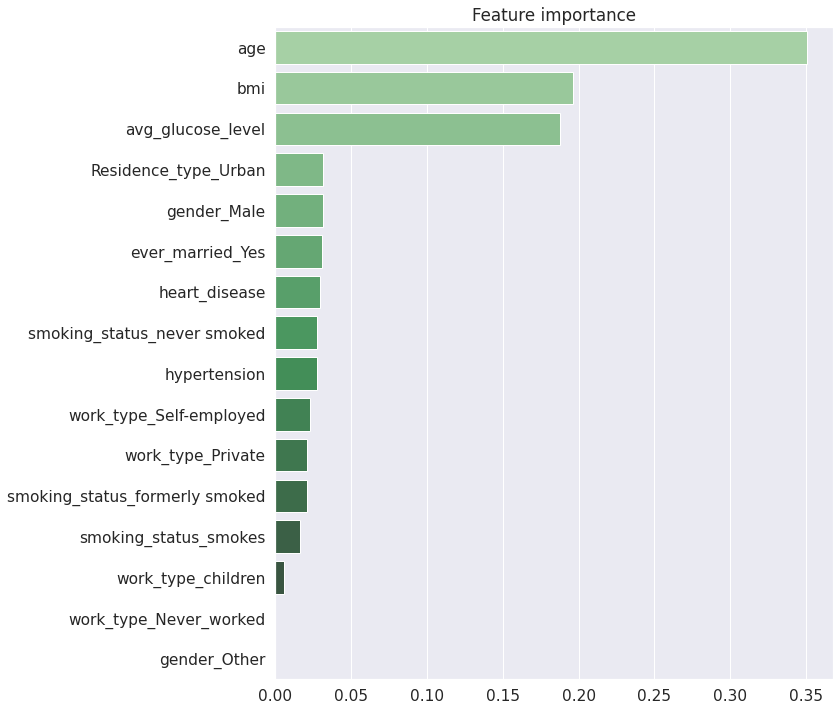

In [96]:
imp = pd.Series(data=rfc_fit_final.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Greens_d", orient='h')

## D. Conclusions

* **Gender:** Although the difference is not much, males are more likely to have stroke event than females.
* **Smoking Status:** Males who formerly smoked and currently smoke have a higher chance of facing a stroke and females who never smoked face a higher chance. Although it was discovered that underlying hypertension may be behind this relationship.
* **Age:** As the age increases, the incidence of stroke also increases. The average age of having a stroke is 67 years old. Furthermore, age has more influence on the chance of getting a stroke compared to gender.
* **Hypertension:** The probability of a patient with hypertension getting a stroke is 13%, which is three times that of a patient without hypertension.
* **Heart Disease:** the probability of a patient with heart disease getting a stroke is 17%, which is four times that of a patient without heart disease.
* **Glucose Level:** When the average glucose level rises, the number of individuals who get strokes and other physical problems also increases.
* **BMI (Body Mass Index):** BMI of patients who have experienced a stroke event is concentrated between 20 and 50. Furthermore, patients with the BMI of 28(overweight) are more likely to have a stroke event.
* **Work Type, Marriage Status, Residence Type:** We cannot clearly say that these 3 factors are directly correlated to the possibility of having a stroke.

From the perspective of pure data analysis, we recommend that this study should be done with more patients in order to obtain more efficient inferences about the probability of having a stroke. Thus, we can better evaluate the inconsistencies at hand.

In regards to machine learning model, we chose to do Random Forest model. Our model showed that the most important features in predicting a stroke event are glucose level, age and bmi. When we compare these features to our EDA findings, they support each other. We can clearly say that these 3 factors are highly related to the probability of having a stroke. When glucose level, age or bmi increases, probability of having a stroke also increases.


## E. Citations
For the machine learning section, these websites was used:
- To normalize the target variable: https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb
- To tune the hyperparameters: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- To create the confusion matrix: https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

To create the important feature visualization this notebook was used: [02-Exploratory-Data-Analysis.ipynb](https://github.com/soltaniehha/Intro-to-Data-Analytics/blob/01a376f677e61340263e797860ad155d872ea8a4/07-EDA/02-Exploratory-Data-Analysis.ipynb)



---




